In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import yfinance as yf

df = yf.download("META", start="2010-01-01", end="2023-01-01")
df.head()

/tmp/ipython-input-1310218974.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("META", start="2010-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2012-05-18,37.964802,44.687839,37.736398,41.758303,573576400
2012-05-21,33.793938,36.405695,32.771084,36.276596,168192700
2012-05-22,30.784954,33.356987,30.725371,32.383786,101786600
2012-05-23,31.778021,32.274552,31.142461,31.152392,73600000
2012-05-24,32.800873,32.979624,31.549615,32.721430,50237200


In [ ]:
df = df[['Close']]

In [ ]:
#A variable for predicting 'n' days out into future
forecast_out = 15

#Create another column (the target or dependent variable) which is shifted by n rows up
df['Prediction'] = df[['Close']].shift(-forecast_out)
print(df.head())

Price           Close Prediction
Ticker           META           
Date                            
2012-05-18  37.964802  26.822632
2012-05-21  33.793938  27.209930
2012-05-22  30.784954  27.080832
2012-05-23  31.778021  28.093760
2012-05-24  32.800873  29.801825


In [ ]:
df.dropna(inplace = True)
df.tail()

Price,Close,Prediction
Ticker,META,
Date,,
2022-12-02,122.633362,117.221176
2022-12-05,121.580719,116.069221
2022-12-06,113.328377,114.817963
2022-12-07,113.139687,119.425774
2022-12-08,114.529976,119.505203


In [ ]:
X = np.array(df.drop(['Prediction'] ,axis = 1))
y = np.array(df['Prediction'])

In [ ]:
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size=0.2 ,random_state=42)

In [ ]:
df.corr()

,Price,Close,Prediction
,Ticker,META,
Price,Ticker,,
Close,META,1.000000,0.986662
Prediction,,0.986662,1.000000


In [ ]:
model = LinearRegression()
model.fit(X_train ,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test ,y_pred)
r2 = r2_score(y_test ,y_pred)

print("MSE and R2 Score: ")
print(mse)
print(r2)

MSE and R2 Score: 
141.87666243756328
0.9810211588138154


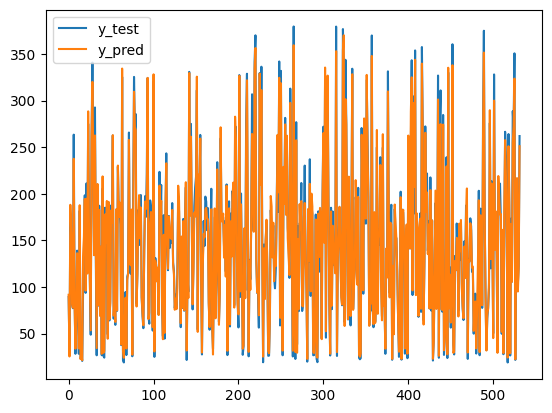

In [ ]:
plt.figure()
plt.plot(y_test ,label="y_test")
plt.plot(y_pred ,label="y_pred")
plt.legend()
plt.show()

In [ ]:
svr = SVR(kernel='rbf' ,C=1e3 ,gamma=0.1)
svr.fit(X_train ,y_train)

svm_confidence = svr.score(X_test ,y_test)
print("SVM Confidence: " ,svm_confidence)

SVM Confidence:  0.9809244785084504
